<a href="https://colab.research.google.com/github/nazeli-terpetrosyan/RandomUser_EDA/blob/main/RandomUser_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random User Dataset EDA

## Importing the Libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from wordcloud import WordCloud

from IPython.display import Image
from IPython.display import display

import requests

## Creating the Dataset

In [ ]:
response = requests.get("https://randomuser.me/api/?results=5000")
response_2 = requests.get("https://randomuser.me/api/?results=5000")

response = pd.json_normalize(response.json()['results'])
response_2 = pd.json_normalize(response_2.json()['results'])

df = pd.concat([response, response_2], ignore_index=True)

### Downloading the Dataset

In [ ]:
from google.colab import files

df.to_csv('dataset.csv')
files.download('dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##EDA on the Dataset

In [ ]:
df = df[['gender', 'phone', 'nat', 'name.title', 'name.first', 'name.last', 'location.city', 'location.country', 'location.coordinates.longitude', 'location.coordinates.latitude',
       'location.timezone.offset', 'location.postcode', 'login.username', 'login.uuid', 'login.password', 'dob.date', 'dob.age', 'registered.date', 'registered.age', 'picture.large']]

### General Info

In [ ]:
df.shape

(10000, 20)

In [ ]:
df.head()

,gender,phone,nat,name.title,name.first,name.last,location.city,location.country,location.coordinates.longitude,location.coordinates.latitude,location.timezone.offset,location.postcode,login.username,login.uuid,login.password,dob.date,dob.age,registered.date,registered.age,picture.large
0,male,08-813-348,FI,Mr,Niilo,Wuollet,Raisio,Finland,-149.4408,-9.6518,-7:00,80813,blackduck223,af244b3c-9ebc-4693-9f23-2af8cd3556eb,xxx123,1979-04-20T17:19:45.756Z,42,2019-02-25T11:53:18.330Z,2,https://randomuser.me/api/portraits/men/55.jpg
1,male,(72) 2066-3206,BR,Mr,Urien,Nogueira,Várzea Paulista,Brazil,126.1936,58.1406,-3:30,92043,angrycat667,6cd37381-17ea-44f7-bee5-18bea55f02a6,wwwwwwww,1966-10-15T10:30:19.711Z,55,2005-11-09T14:19:15.139Z,16,https://randomuser.me/api/portraits/men/68.jpg
2,male,0513-0449317,DE,Mr,Heinz Dieter,Nolte,Bad Wildungen,Germany,67.3067,-52.5981,+3:30,43818,organicleopard911,b330aa54-0a29-411e-a599-9436a92b1567,catdog,1970-04-10T08:47:00.127Z,51,2010-08-04T22:24:49.951Z,11,https://randomuser.me/api/portraits/men/3.jpg
3,female,(069)-179-6543,TR,Miss,Ege,Karadaş,Rize,Turkey,64.0742,9.5501,+10:00,85087,ticklishfish872,a1fbb398-e770-4825-977e-52b192a796fe,killer1,1992-08-21T14:12:06.978Z,29,2003-12-07T01:19:45.357Z,18,https://randomuser.me/api/portraits/women/9.jpg
4,male,05-3042-6251,AU,Mr,Duane,Martinez,Albury,Australia,-71.7952,24.3740,-5:00,999,brownleopard347,73f46a0d-68ee-4450-a8d4-de1109f2cea9,draven,1998-02-23T21:24:48.371Z,23,2011-10-04T12:40:20.106Z,10,https://randomuser.me/api/portraits/men/53.jpg


#### Checking for missing values and the data type

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   gender                          10000 non-null  object
 1   phone                           10000 non-null  object
 2   nat                             10000 non-null  object
 3   name.title                      10000 non-null  object
 4   name.first                      10000 non-null  object
 5   name.last                       10000 non-null  object
 6   location.city                   10000 non-null  object
 7   location.country                10000 non-null  object
 8   location.coordinates.longitude  10000 non-null  object
 9   location.coordinates.latitude   10000 non-null  object
 10  location.timezone.offset        10000 non-null  object
 11  location.postcode               10000 non-null  object
 12  login.username                  10000 non-null 

### Gender, Name and Photo

#### Male vs Female

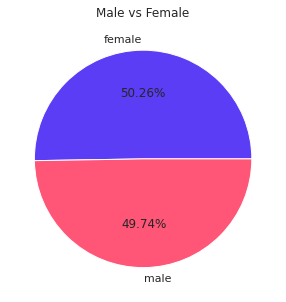

In [ ]:
sns.set(rc={'figure.figsize':(9, 5)})
df['gender'].value_counts().plot(kind="pie", label="", autopct="%.2f%%", colors=["#5a3df5", "#FF5677"])
plt.title("Male vs Female")
plt.show()

#### Title Distribution

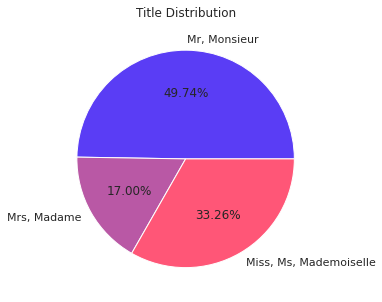

In [ ]:
titles = df['name.title'].value_counts()

title_miss = titles['Ms'] + titles['Miss'] + titles['Mademoiselle']
title_mr = titles['Mr'] + titles['Monsieur']
title_mrs = titles['Mrs'] + titles['Madame']

sns.set(rc={'figure.figsize':(9, 5)})
plt.pie([title_mr, title_mrs, title_miss], labels = ['Mr, Monsieur', 'Mrs, Madame', 'Miss, Ms, Mademoiselle'], autopct="%.2f%%", colors=["#5a3df5", "#B958A5", "#FF5677"])
plt.title("Title Distribution")
plt.show()

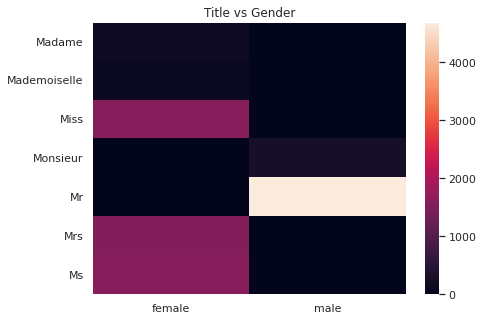

In [ ]:
sns.set(rc={'figure.figsize':(7, 5)})
sns.heatmap(pd.crosstab(df['name.title'], df['gender']))
plt.xlabel("")
plt.ylabel("")
plt.title("Title vs Gender")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



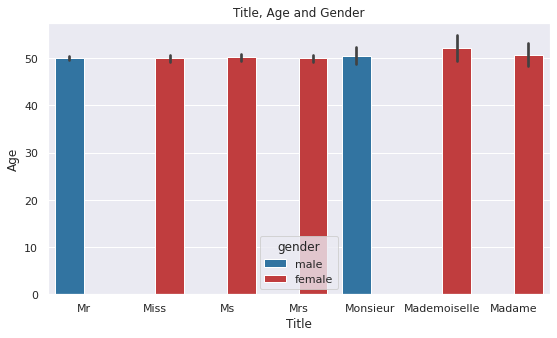

In [ ]:
sns.set(rc={'figure.figsize':(9, 5)})
sns.barplot(df['name.title'], df['dob.age'], hue = df["gender"], palette = ['tab:blue', 'tab:red'])
plt.title("Title, Age and Gender")
plt.xlabel("Title")
plt.ylabel('Age')
plt.show()

#### The Most Common Names

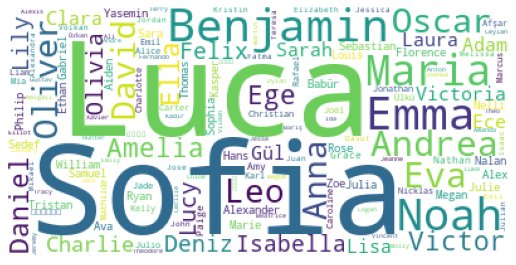

In [ ]:
sns.set(rc={'figure.figsize':(9, 5)})
wordcloud_name = WordCloud(background_color = 'white').generate(' '.join(df['name.first']))
plt.imshow(wordcloud_name)
plt.axis("off")
plt.show()

#### The Most Common Surnames

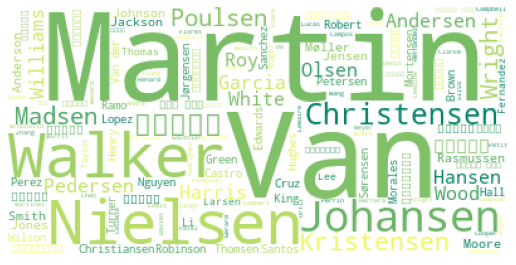

In [ ]:
sns.set(rc={'figure.figsize':(9, 5)})
wordcloud_last = WordCloud(background_color = 'white', colormap="summer").generate(' '.join(df['name.last']))
plt.imshow(wordcloud_last)
plt.axis("off")
plt.show()

#### The Most Popular Profile Photo

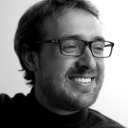


Has been used 67 times


In [ ]:
photos = df['picture.large'].value_counts().head(1)
display(Image(photos.index.tolist()[0]))
print()
print("Has been used " + str(photos[0]) + " times")

### Location and Nationality

#### User Location (Coordinates, Country and Timezone)

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scattergeo(
                         lat = df['location.coordinates.latitude'],
                     lon = df['location.coordinates.longitude'],
                     text = df['location.country'] + ", GMT" + df['location.timezone.offset'],
#                     mode="markers+text",|
                     marker={
                        "color": "blue",
                        "line": {"width": 1},
                 "size": 1}
                           ))

fig.update_layout(
    title_text="User Location (Coordinates, Country and Timezone)"
)

fig.show()

Conclusion: The coordinates, countries, and timezones do not match

#### Countries and Cities

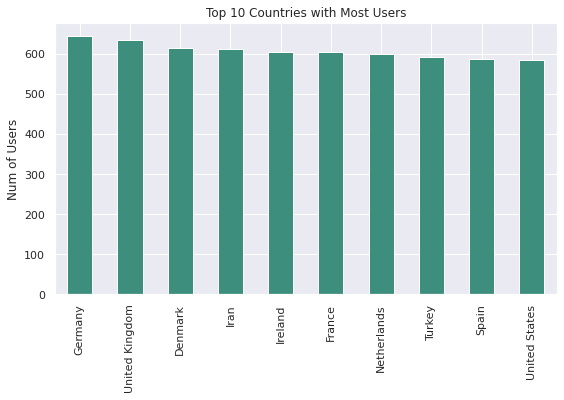

In [ ]:
sns.set(rc={'figure.figsize':(9, 5)})
df['location.country'].value_counts().head(10).plot(kind="bar", color="#3E8E7E")
plt.title("Top 10 Countries with Most Users")
plt.ylabel("Num of Users")
plt.show()

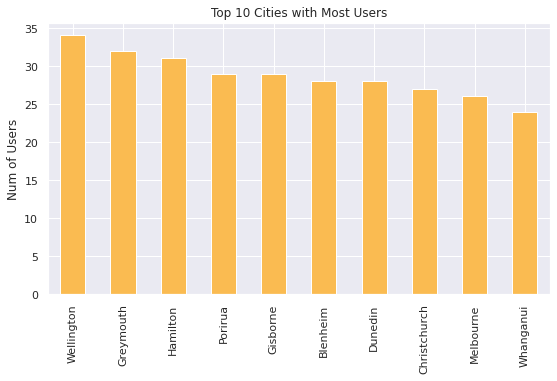

In [ ]:
sns.set(rc={'figure.figsize':(9, 5)})
df['location.city'].value_counts().head(10).plot(kind="bar", color="#FABB51")
plt.title("Top 10 Cities with Most Users")
plt.ylabel("Num of Users")
plt.show()

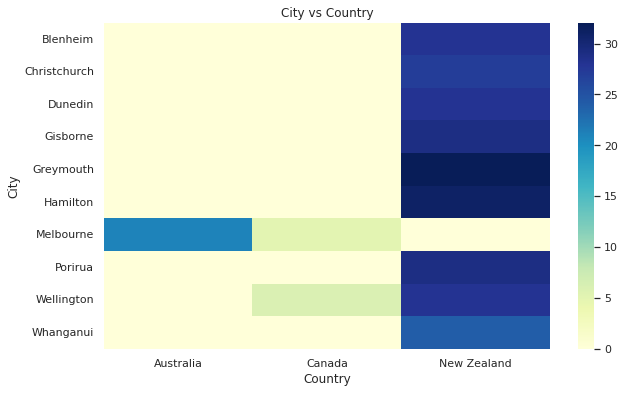

In [ ]:
sns.set(rc={'figure.figsize':(10, 6)})
cities = df[df["location.city"].isin(df['location.city'].value_counts().head(10).index.tolist())]
sns.heatmap(pd.crosstab(cities['location.city'], cities['location.country']), cmap="YlGnBu")
plt.title("City vs Country")
plt.ylabel("City")
plt.xlabel("Country")
plt.show()

#### Timezone

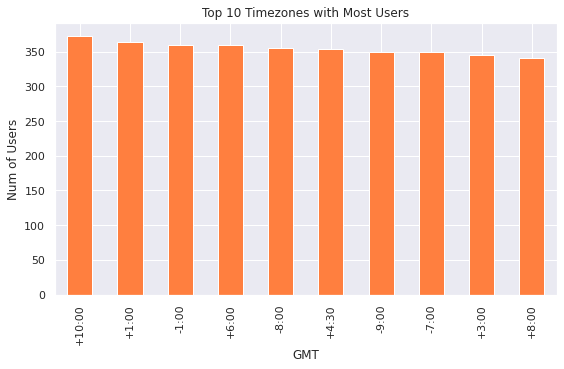

In [ ]:
sns.set(rc={'figure.figsize':(9, 5)})
df['location.timezone.offset'].value_counts().head(10).plot(kind="bar", color="#FF7F3F")
plt.title("Top 10 Timezones with Most Users")
plt.ylabel("Num of Users")
plt.xlabel("GMT")
plt.show()

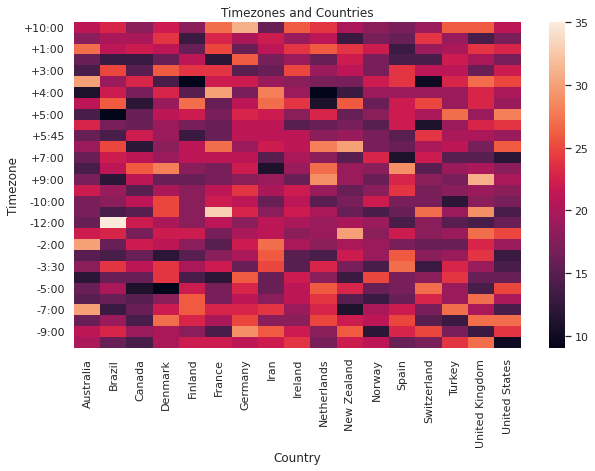

In [ ]:
sns.set(rc={'figure.figsize':(10, 6)})
sns.heatmap(pd.crosstab(df['location.timezone.offset'], df['location.country']))
plt.title("Timezones and Countries")
plt.ylabel("Timezone")
plt.xlabel("Country")
plt.show()

#### Nationality and Country

In [ ]:
!pip install pycountry

In [ ]:
import pycountry

countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_2

codes = [countries.get(country, 'Unknown code') for country in df['location.country']]

In [ ]:
nat = df['nat'].tolist()

sum = 0
for i in range(len(nat)):
  if nat[i] == codes[i]:
    sum +=1

print("Approximately " + str(sum/100) + "% (" + str(sum) + ") of users live in the country of their nationality")

Approximately 93.89% (9389) of users live in the country of their nationality


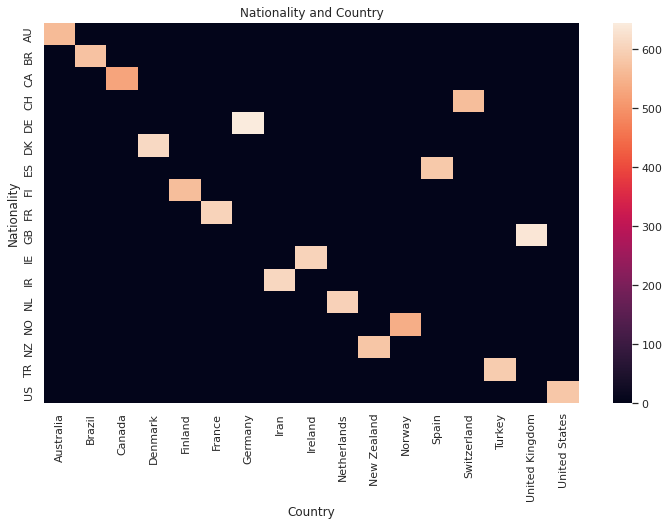

In [ ]:
sns.set(rc={'figure.figsize':(12, 7)})
sns.heatmap(pd.crosstab(df['nat'], df['location.country']))
plt.title("Nationality and Country")
plt.ylabel("Nationality")
plt.xlabel("Country")
plt.show()

#### Checking Postal Code Validity

In [ ]:
!pip install pgeocode

In [ ]:
import pgeocode

sum = 0

for i in range(len(codes[:100])):
  if codes[i] != 'Unknown code':
    data = pgeocode.Nominatim(codes[i])
    info = data.query_postal_code(df['location.postcode'][i])[1]
    if isinstance(info, float):
      sum += 1

print("Out of first 100 user postal codes " + str(sum) + " are not valid (are not located in the registered country)")

Out of first 100 user postal codes 76 are not valid (are not located in the registered country)


### Username and Password

#### The Most Common Passwords

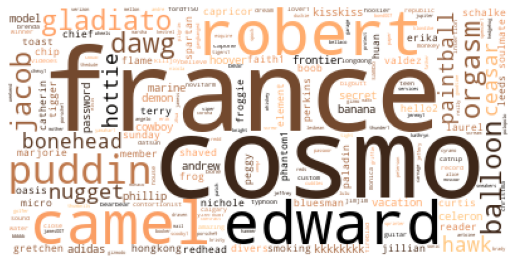

In [ ]:
sns.set(rc={'figure.figsize':(9, 5)})
wordcloud_pass = WordCloud(background_color = 'white', colormap="copper").generate(' '.join(df['login.password']))
plt.imshow(wordcloud_pass)
plt.axis("off")
plt.show()

In [ ]:
df['login.password'].value_counts()

puddin       7
gladiato     7
bonehead     6
paintball    6
kisskiss     6
            ..
kimberly     1
firewall     1
fireman      1
cascade      1
forget       1
Name: login.password, Length: 5596, dtype: int64

#### Checking Password Strength

In [ ]:
!pip install password-strength

In [ ]:
from password_strength import PasswordStats

pass_stats = df['login.password']
pass_stats = pass_stats.apply(lambda row: PasswordStats(row).strength())

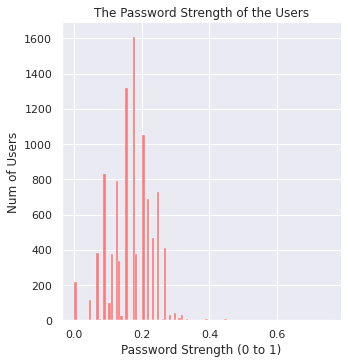

In [ ]:
sns.displot(pass_stats, color="#FF5959")
plt.title("The Password Strength of the Users")
plt.ylabel("Num of Users")
plt.xlabel("Password Strength (0 to 1)")
plt.show()

##### Nationality, Gender, and Password Strength

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



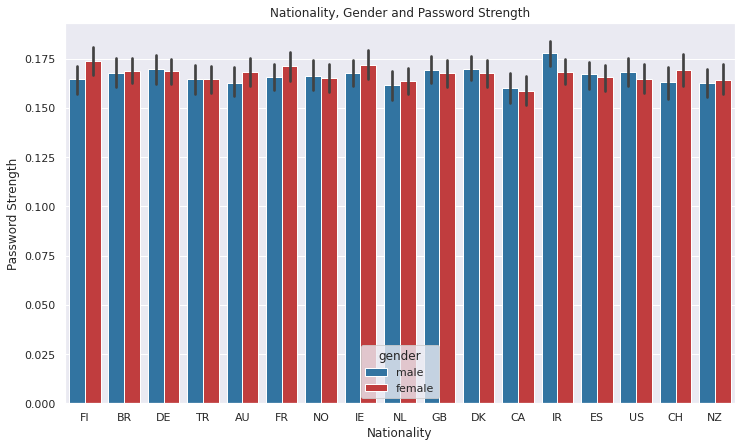

In [ ]:
sns.set(rc={'figure.figsize':(12, 7)})
sns.barplot(df['nat'], pass_stats, hue = df["gender"], palette = ['tab:blue', 'tab:red'])
plt.title("Nationality, Gender and Password Strength")
plt.xlabel("Nationality")
plt.ylabel('Password Strength')
plt.show()

##### Age, Gender, and Password Strength

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



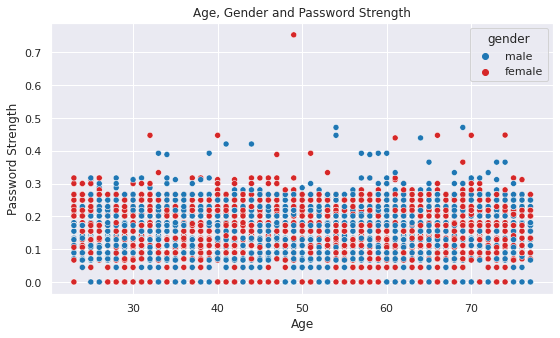

In [ ]:
sns.set(rc={'figure.figsize':(9, 5)})
sns.scatterplot(df['dob.age'], pass_stats, hue=df["gender"], palette = ['tab:blue', 'tab:red'])
plt.title("Age, Gender and Password Strength")
plt.xlabel("Age")
plt.ylabel('Password Strength')
plt.show()

#### Checking for Username and UUID Repetitions

In [ ]:
print(df['login.username'].value_counts())

blueelephant576       2
orangewolf695         2
redostrich559         2
tinydog289            2
smallfrog607          2
                     ..
heavypanda427         1
ticklishostrich364    1
organicfish480        1
beautifulfrog734      1
sadtiger945           1
Name: login.username, Length: 9911, dtype: int64


Conclusion: Some usernames are invalid since usernames can not repeat

In [ ]:
print(df['login.uuid'].value_counts())

cfe90fec-dd73-451b-808d-7ed16fd73bef    1
111f27d1-cb11-456f-8508-dee7d9aeeb24    1
7b8005c7-b6c9-436f-8b0b-13ffeef9ec58    1
b4f876eb-9891-4560-96cb-4b8261917b82    1
cba34ab9-1f5c-4a6a-93c0-f183baa4046d    1
                                       ..
d33f0e9c-ecd6-4e98-a6e2-33bda964d445    1
2f8b2d0d-07a2-4adb-813f-26a384a68293    1
19c45fa1-5262-46eb-b40b-80d5b0df7687    1
b295c4ef-b6b1-46d5-987c-c27de7b8f114    1
5a683535-9ac3-4192-bdd3-0a3cb1daf49a    1
Name: login.uuid, Length: 10000, dtype: int64


Conclusion: UUIDs do not repeat

### Age and Registered Duration

#### Users' Age

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



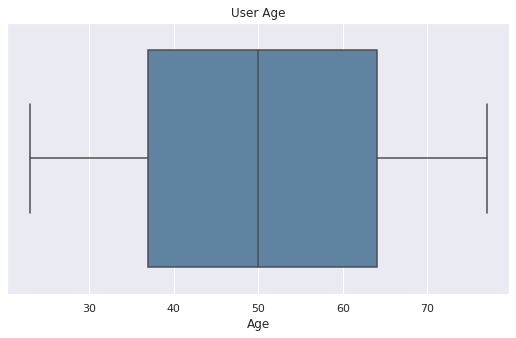

In [ ]:
sns.set(rc={'figure.figsize':(9, 5)})
sns.boxplot(df['dob.age'], color="#5584AC")
plt.title("User Age")
plt.xlabel("Age")
plt.show()

#### Users' Registration Age

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



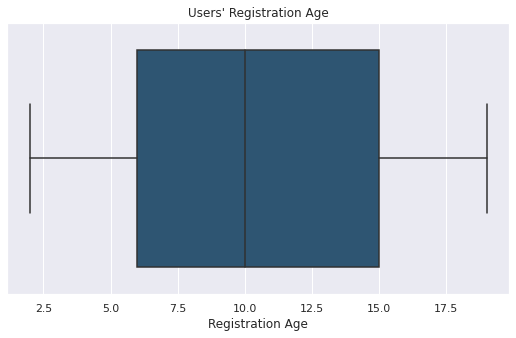

In [ ]:
sns.boxplot(df['registered.age'], color="#22577E")
plt.title("Users' Registration Age")
plt.xlabel("Registration Age")
plt.show()

#### The Oldest and The Newest User


In [ ]:
def date2sec(row):
  row = row.split('T')
  date = row[0].split('-')
  time = row[1].split(':')
  time[2] = time[2][0:2]
  date_time = date + time

  date_time = list(map(int, date_time))

  sum = 0

  sum+=date_time[0] * 31536000 #year
  sum+=date_time[1] * 2592000 # month
  sum+=date_time[2] * 86400 # day
  sum+=date_time[3] * 3600 # hour
  sum+=date_time[4] * 60 # minute
  sum+=date_time[5]      # second

  return sum

registered_stats = df['registered.date']
registered_stats = registered_stats.apply(lambda row: date2sec(row))

in_min = registered_stats.tolist().index(registered_stats.min())
print("The oldest user is " + df["name.first"].iloc[in_min] + " " + df["name.last"].iloc[in_min] + " (" + str(df["registered.age"].iloc[in_min]) + " years)")
print()
in_max = registered_stats.tolist().index(registered_stats.max())
print("The newest user is " + df["name.first"].iloc[in_max] + " " + df["name.last"].iloc[in_max] + " (" + str(df["registered.age"].iloc[in_max]) + " years)")

The oldest user is Geoff Long (19 years)

The newest user is Fanny Andre (2 years)


#### User Age and Registration Age

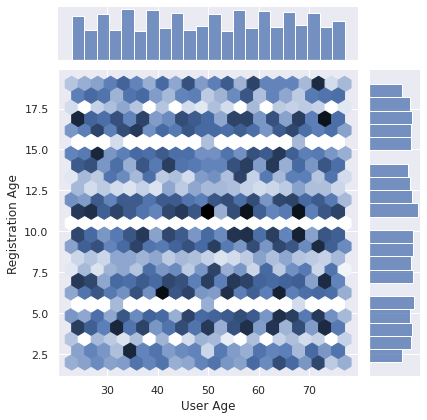

In [ ]:
sns.jointplot(x=df['dob.age'], y=df['registered.age'], kind="hex")
plt.xlabel("User Age")
plt.ylabel("Registration Age")
plt.show()

#### Users' Zodiac Signs

In [ ]:
from bisect import bisect
signs = [(1,20,"Cap"), (2,18,"Aqu"), (3,20,"Pis"), (4,20,"Ari"),
         (5,21,"Tau"), (6,21,"Gem"), (7,22,"Can"), (8,23,"Leo"),
         (9,23,"Vir"), (10,23,"Lib"), (11,22,"Sco"), (12,22,"Sag"),
         (12,31,"Cap")]
def zodiac_sign(m,d):
    return signs[bisect(signs,(m,d))][2]


In [ ]:
zod_stats = df['dob.date']
def preproc(row):
  row = row.split('T')
  row.pop()
  row = row[0].split('-')
  row.pop(0)
  row = list(map(int, row))
  return row

zod_stats = zod_stats.apply(lambda row: preproc(row))
zod_stats = zod_stats.apply(lambda row: zodiac_sign(row[0], row[1]))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



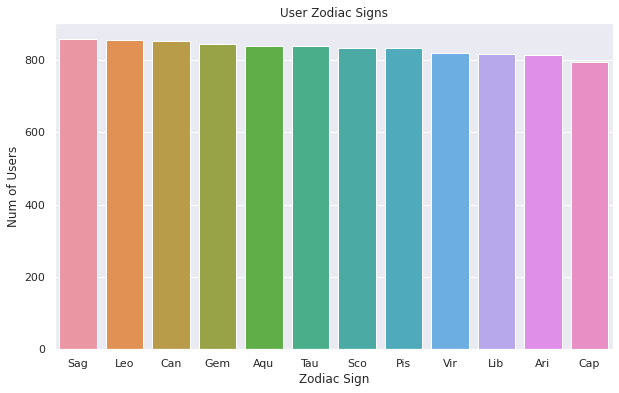

In [ ]:
sns.set(rc={'figure.figsize':(10, 6)})
sns.countplot(zod_stats, order = zod_stats.value_counts().index)
plt.title("User Zodiac Signs")
plt.xlabel("Zodiac Sign")
plt.ylabel("Num of Users")
plt.show()